In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [17]:
#Set option to print float with 2 number after decimal point 
pd.options.display.float_format= "{:.2f}".format

In [18]:
df = pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67


Data has:
- 8 columns , 6435 rows.
- Each row shows the sales of Walmart in a week. 

In [19]:
df.duplicated().sum()

0

No duplicated row

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Data description:
- Store: The store number
- Date: The week of sales in USD
- Weekly_Sales: Sales for the given storeo 
- Holiday_Flag: Whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature: Temperature on the day of sale in Fahrenheit
- Fuel_Price: Cost of fuel in the region
- CPI :Prevailing consumer price index
- Unemployment: Prevailing unemployment rate

Further information provided by publisher:  
Holiday Events  
- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [21]:
holiday_events = {
    'SuperBowl':['12-02-2010','11-02-2011','10-02-2012','08-02-2013'],
    'LabourDay':['10-09-2010','05-09-2011','07-09-2012','06-09-2013'],
    'Thanksgiving':['26-11-2010','25-11-2011','23-11-2012','29-11-2013'],
    'Christmas':['31-12-2010','30-12-2011','28-12-2012','27-12-2013']
    }

flatten_events = {val:key for key,lst in holiday_events.items() for val in lst}

In [22]:
df['Holiday_Event'] = df['Date'].map(flatten_events)

In [23]:
#Convert Date column to datetime type 
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


Need to convert Date column to datetime type 

In [24]:
#Convert Temperature column from Fahrenheit to Celsius
df['Temperature'] = (df['Temperature'] - 32 ) * (5/9)

Convert temperature to Celsius for convinience.

In [36]:
#Add Month and Year column 
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [37]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Event,Month,Year
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11,NaN,2,2010
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11,SuperBowl,2,2010
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11,NaN,2,2010
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11,NaN,2,2010
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11,NaN,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.27,4.00,192.01,8.68,NaN,9,2012
6431,45,2012-10-05,733455.07,0,18.27,3.98,192.17,8.67,NaN,10,2012
6432,45,2012-10-12,734464.36,0,12.48,4.00,192.33,8.67,NaN,10,2012
6433,45,2012-10-19,718125.53,0,13.59,3.97,192.33,8.67,NaN,10,2012


In [25]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,15.92,3.36,171.58,8.00
std,12.99,564366.62,0.26,10.25,0.46,39.36,1.88
min,1.00,209986.25,0.00,-18.92,2.47,126.06,3.88
25%,12.00,553350.10,0.00,8.59,2.93,131.74,6.89
50%,23.00,960746.04,0.00,17.04,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,23.86,3.73,212.74,8.62
max,45.00,3818686.45,1.00,37.86,4.47,227.23,14.31


In [26]:
df.isnull().sum()

Store               0
Date                0
Weekly_Sales        0
Holiday_Flag        0
Temperature         0
Fuel_Price          0
CPI                 0
Unemployment        0
Holiday_Event    6030
dtype: int64

No missing values. The data is fully collected.  
- Store: this data is conducted from store 1 to store 45 
- Weekly_Sales: the average weekly sales among the stores is 960746.04 $. The prime week can be up to nearly 4 Million $.
- Holiday_Flag: barely binary value. 
- Temperature: customer could also go out for a shopping even in minimal temperature of -2.06 Fahrenheit (approx -18 Celsius degree)
- Fuel_Price, ,CPI, Unemplyment: normal ratio 

$\rightarrow$ Nothing seems abnormal. 


In [27]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Event
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11,NaN
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11,SuperBowl
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11,NaN
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11,NaN
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11,NaN
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.27,4.00,192.01,8.68,NaN
6431,45,2012-10-05,733455.07,0,18.27,3.98,192.17,8.67,NaN
6432,45,2012-10-12,734464.36,0,12.48,4.00,192.33,8.67,NaN
6433,45,2012-10-19,718125.53,0,13.59,3.97,192.33,8.67,NaN


QUESTION:  
- Walmart Sales Trend over the years

In [28]:
sales_trend = df[['Date','Weekly_Sales']].groupby('Date').sum()
sales_trend = sales_trend.sort_index()
sales_trend

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


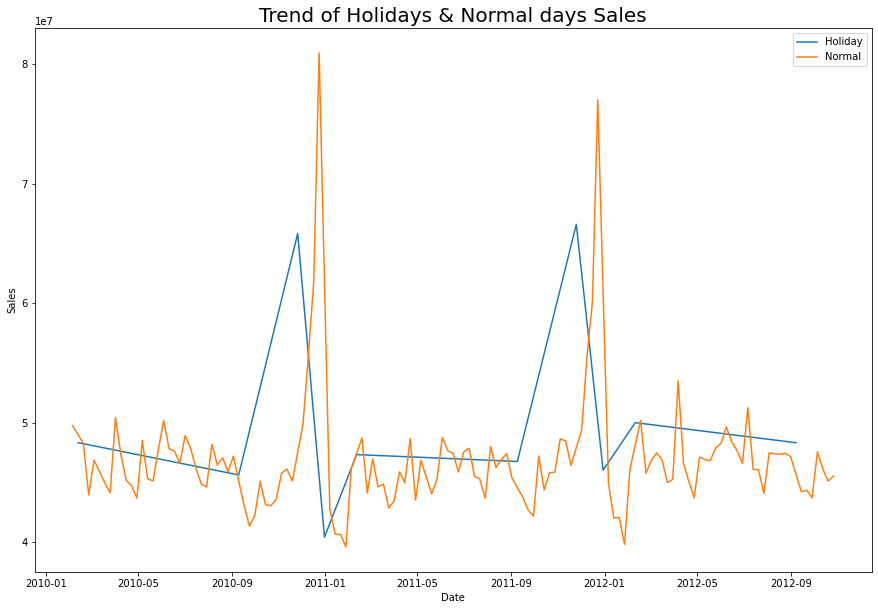

In [29]:
#Weekly Sales of normal days and holidays 
holiday_sales_df = df[df['Holiday_Flag'] == 1].sort_values(by='Date')
normal_sales_df = df[df['Holiday_Flag'] == 0].sort_values(by ='Date')
holiday_sales = holiday_sales_df.groupby('Date')['Weekly_Sales'].sum()
normal_sales = normal_sales_df.groupby('Date')['Weekly_Sales'].sum()
#Plot trend 
plt.figure(figsize = (15,10))
plt.plot(holiday_sales)
plt.plot(normal_sales)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Trend of Holidays & Normal days Sales',size =20)
plt.legend(['Holiday','Normal'])
plt.show()

In [35]:
holiday_sales_df[holiday_sales_df['Date'].dt.year == 2010]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Event
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11,SuperBowl
3862,28,2010-02-12,1558968.49,1,8.82,2.95,126.50,13.97,SuperBowl
4005,29,2010-02-12,529672.95,1,-2.14,2.77,131.59,10.06,SuperBowl
5864,42,2010-02-12,575709.96,1,9.98,2.83,126.50,9.77,SuperBowl
5149,37,2010-02-12,529852.70,1,7.84,2.55,210.00,8.55,SuperBowl
...,...,...,...,...,...,...,...,...,...
5910,42,2010-12-31,428953.60,1,9.82,3.15,127.09,9.00,Christmas
2192,16,2010-12-31,575317.38,1,-6.86,2.83,191.26,6.99,Christmas
3765,27,2010-12-31,1440963.00,1,-1.34,3.34,136.67,8.02,Christmas
5624,40,2010-12-31,811318.30,1,-7.06,3.18,132.82,5.29,Christmas


Text(0.5, 1.0, 'Distribution of Holiday Events Sales')

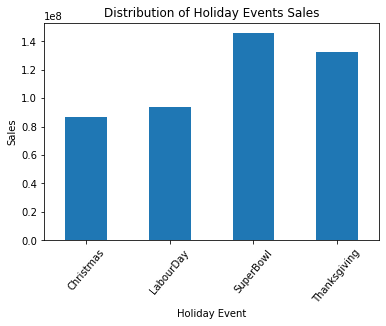

In [30]:
#Which holiday event has the highest sales
holiday_sales_dist = df.groupby('Holiday_Event')['Weekly_Sales'].sum()
fig= holiday_sales_dist.plot(kind='bar',rot=50)
plt.xlabel('Holiday Event')
plt.ylabel('Sales')
plt.title('Distribution of Holiday Events Sales')